In [1]:
import os
import sys
sys.path.append('..')

In [2]:
from BasicDataPrep_V1 import * # Not Required for Inference, but I am planning to plot few things here.
from ClusterTree import *
from ReadWritePickleFile import *

import pandas as pd  # Not Required for Inference, but I am planning to plot few things here.
import matplotlib.pyplot as plt  # Not Required for Inference, but I am planning to plot few things here.
%matplotlib inline

## Test - 1
### Divided by one set of attributes and assigned label by another.

In [3]:
histrocalDataFilePath = './MAB-Experiment-4-DataForSegmentByBuyingTrend.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
dataForPred.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
conquerDataColumns = ['1005', '1015', '1016', '1017', '1032', '1033', '1034', '1039', '1042', '1047', '1050',
         '1051', '1052', '1078', '1080', '40000', '40006', '1000', '1014', '1001']

sourcePath = './Test-1-Iterative.pickle'
clusterTree = readPicklefile(sourcePath)

This is the only place I am mentioning the info 'columns' separately, because the file contains
all columns which was used for diving and conquering together. 
It actually doesn't matter even if you pass something which haven't used when you have created the model,
but still I don't want to create confusion at this moment so keeping it simple.

In [5]:
inferenceCols = ['Adults','Children','LeadDays','LengthOfStay','ArrivalDate-WeekDay']
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info) 
    preds.append(pred)
dataForPred['Predicted_Cluster'] = preds

In [6]:
dataForPred['Predicted_Cluster'].value_counts()

test-1-iterative__cluster_9          2528
test-1-iterative__cluster_4          2139
test-1-iterative__cluster_5          1856
test-1-iterative__cluster_7          1539
test-1-iterative__cluster_2          1301
test-1-iterative__cluster_3          1225
test-1-iterative__cluster_0          1086
test-1-iterative__cluster_6          1058
test-1-iterative__cluster_1           776
test-1-iterative__cluster_8           760
test-1-iterative__cluster_default     732
Name: Predicted_Cluster, dtype: int64

At this moment I have got back all the predictions.
In this file I want to plot the data to see their underlying pattern.
** We had used separate conquering columns for this model. More precisely, we wanted to group together people
with same buying behavior so, the pattern we would look for in buying behavior of each cluster. 

### Data Preparation for Plotting

In [7]:
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
for c in conquerDataColumns:
    dataForPred_buyTrendByCluster[c] = dataForPred_buyTrendByCluster[c]/max(dataForPred_buyTrendByCluster[c])

dataForPred_buyTrendByCluster_Agg = dataForPred_buyTrendByCluster.groupby(by=['Predicted_Cluster']).mean()
dataForPred_buyTrendByCluster_Agg.reset_index(inplace=True, drop=False)
dataForPred_buyTrendByCluster_Agg

,Predicted_Cluster,1005,1015,1016,1017,1032,1033,1034,1039,1042,...,1050,1051,1052,1078,1080,40000,40006,1000,1014,1001
0,test-1-iterative__cluster_0,0.133604,0.889514,0.064550,0.019435,0.016673,0.003783,0.024039,0.015752,0.065471,...,0.016673,0.020356,0.006545,0.128080,0.007466,0.008386,0.093093,0.004704,0.031404,0.039691
1,test-1-iterative__cluster_1,0.007831,0.636634,0.260383,0.049064,0.015562,0.007831,0.268114,0.052930,0.023294,...,0.007831,0.019428,0.034890,0.011697,0.033602,0.319656,0.007831,0.010408,0.000100,0.012985
2,test-1-iterative__cluster_2,0.023157,0.395910,0.408975,0.173795,0.036991,0.000869,0.008554,0.006248,0.256800,...,0.025463,0.052362,0.000869,0.009323,0.307525,0.027768,0.339036,0.000869,0.004711,0.028537
3,test-1-iterative__cluster_3,0.262115,0.214772,0.543719,0.206610,0.080908,0.166614,0.043361,0.018874,0.063767,...,0.017241,0.021322,0.043361,0.012344,0.007446,0.005814,0.014792,0.043361,0.178858,0.014792
4,test-1-iterative__cluster_4,0.062740,0.605463,0.293198,0.061337,0.003840,0.076764,0.065077,0.018798,0.028148,...,0.076296,0.272163,0.039367,0.006177,0.034225,0.018331,0.079101,0.068349,0.029083,0.066480
5,test-1-iterative__cluster_5,0.045893,0.386376,0.495740,0.085760,0.025421,0.006565,0.281861,0.226370,0.029731,...,0.009259,0.016262,0.009797,0.010336,0.024882,0.053974,0.100305,0.012491,0.094918,0.030269
6,test-1-iterative__cluster_6,0.008606,0.356397,0.498160,0.112565,0.012386,0.001990,0.010496,0.002935,0.230701,...,0.348836,0.287406,0.009551,0.008606,0.242987,0.207074,0.009551,0.001990,0.004825,0.003880
7,test-1-iterative__cluster_7,0.347694,0.612774,0.204758,0.087811,0.059223,0.032585,0.018942,0.009196,0.065071,...,0.009846,0.020241,0.006597,0.245689,0.016343,0.005298,0.056625,0.004648,0.015693,0.035834
8,test-1-iterative__cluster_8,0.044832,0.039570,0.906588,0.036938,0.081671,0.042201,0.034307,0.026413,0.207974,...,0.031676,0.055358,0.011941,0.002731,0.102721,0.046148,0.169820,0.018519,0.042201,0.021151
9,test-1-iterative__cluster_9,0.051519,0.327599,0.499654,0.085534,0.042422,0.025018,0.017108,0.013152,0.174529,...,0.057452,0.187977,0.016317,0.007220,0.068527,0.016317,0.133394,0.005242,0.026205,0.015130


### Plotting

2020-02-10 11:24:53,244 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:53,246 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


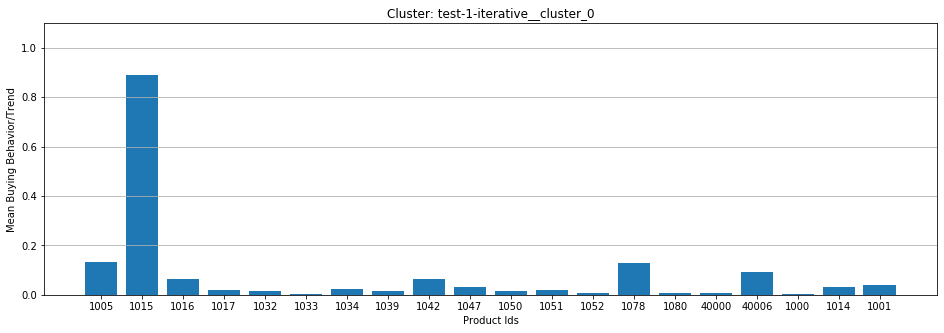

In [8]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[0][conquerDataColumns].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-1-iterative__cluster_0')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:53,444 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:53,446 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


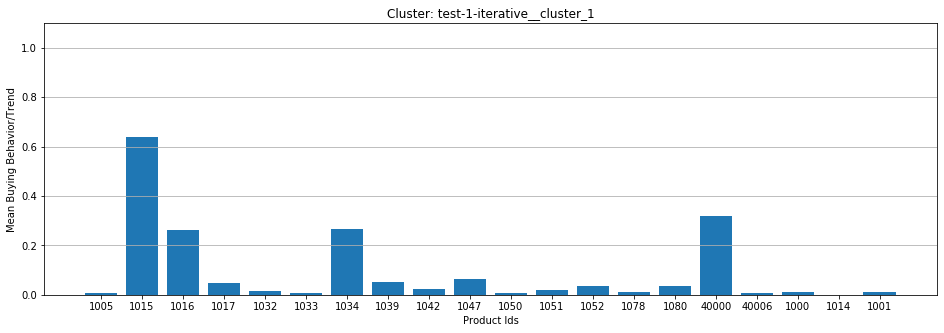

In [9]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[1][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_1')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:53,646 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:53,647 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


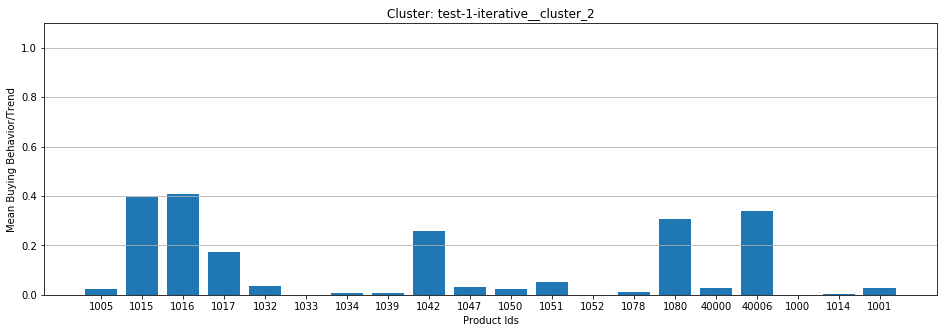

In [10]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[2][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_2')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:53,833 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:53,835 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


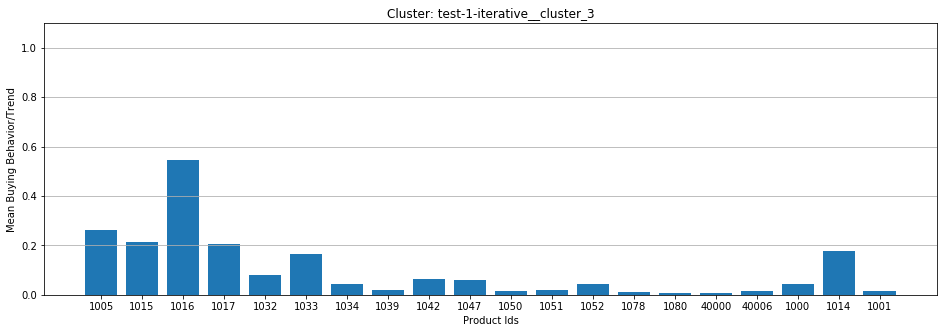

In [11]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[3][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_3')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,009 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,010 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


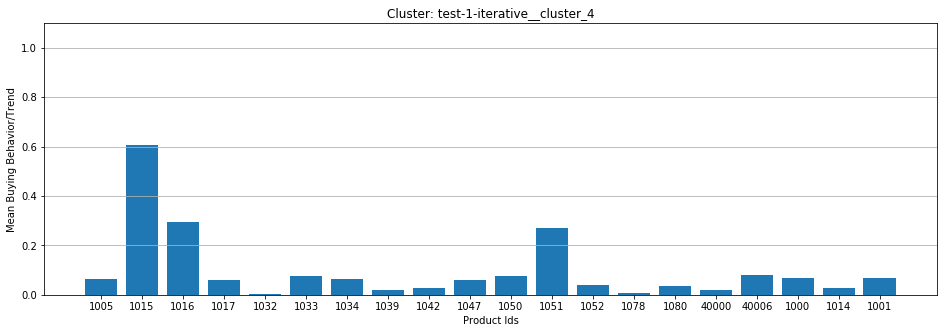

In [12]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[4][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_4')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,181 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,182 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


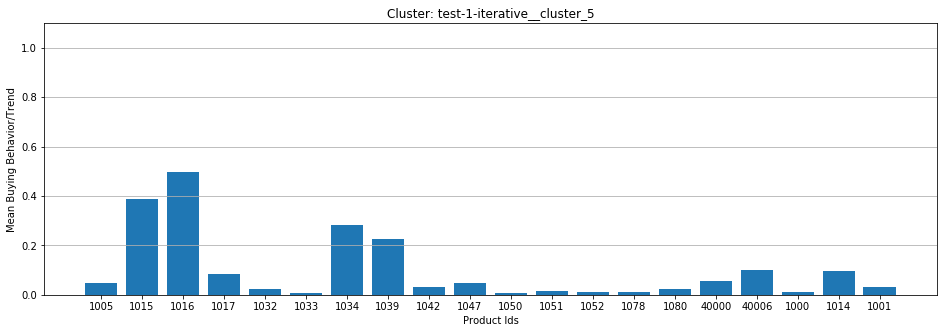

In [13]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[5][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_5')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,351 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,352 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


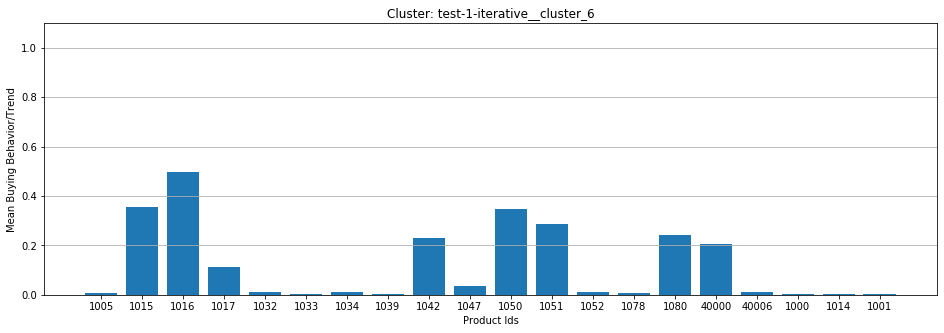

In [14]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[6][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_6')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,541 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,542 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


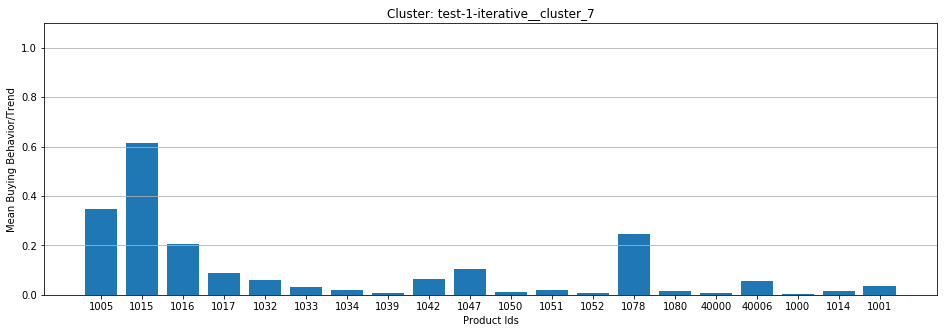

In [15]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[7][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_7')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,734 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,735 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


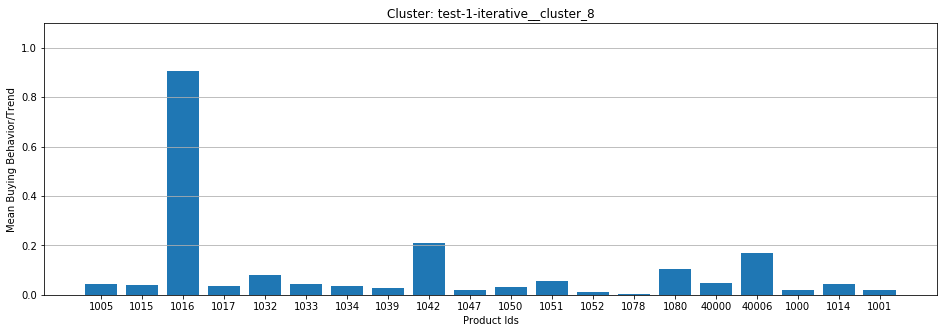

In [16]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[8][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_8')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:54,972 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:54,973 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


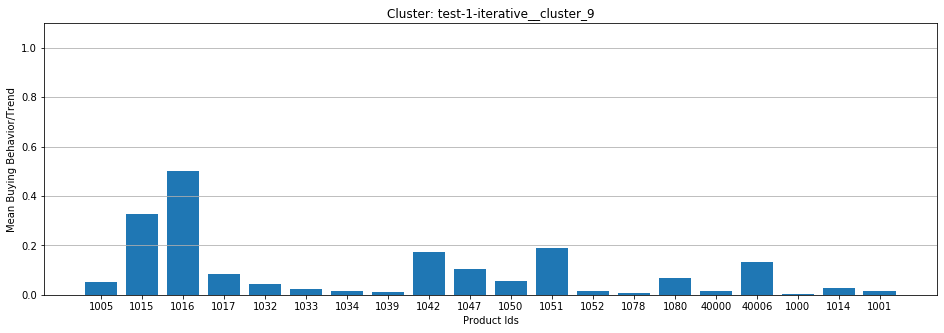

In [17]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[9][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_9')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:24:55,152 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:24:55,153 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


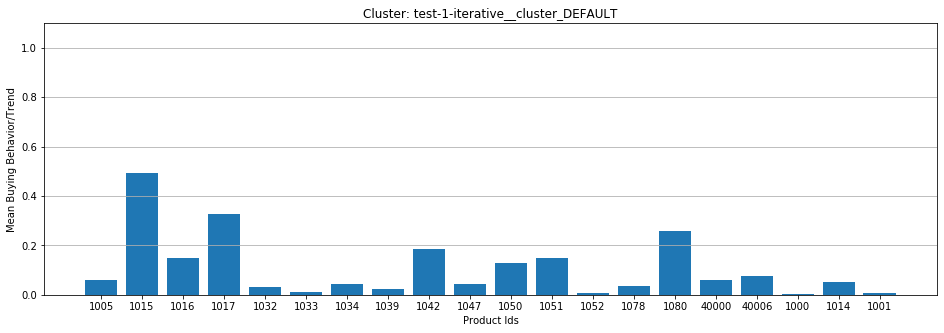

In [18]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[10][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative__cluster_DEFAULT')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

## Test - 1 - Except Rooms
### Divided by one set of attributes and assigned label by another.

In [19]:
histrocalDataFilePath = './MAB-Experiment-4-DataForSegmentByBuyingTrend-ExceptRooms.csv'
dataForPred = pd.read_csv(histrocalDataFilePath)
dataForPred.drop(columns = 'Unnamed: 0', inplace=True)

In [20]:
conquerDataColumns = ['1005', '1032', '1033', '1034', '1039', '1042', '1047', '1050',
         '1051', '1052', '1078', '1080', '40000', '40006', '1000', '1014', '1001']

sourcePath = './Test-1-Iterative-ExceptRooms.pickle'
clusterTree = readPicklefile(sourcePath)

This is the only place I am mentioning the info 'columns' separately, because the file contains
all columns which was used for diving and conquering together. 
It actually doesn't matter even if you pass something which haven't used when you have created the model,
but still I don't want to create confusion at this moment so keeping it simple.

In [21]:
inferenceCols = ['Adults','Children','LeadDays','LengthOfStay','ArrivalDate-WeekDay']
preds = []
for i in range(len(dataForPred)):
    info = dict(dataForPred.loc[i][inferenceCols])
    pred, _ = clusterTree.getClusterID(info) 
    preds.append(pred)
dataForPred['Predicted_Cluster'] = preds

In [22]:
dataForPred['Predicted_Cluster'].value_counts()

test-1-iterative-exceptrooms__cluster_5          2055
test-1-iterative-exceptrooms__cluster_3          2019
test-1-iterative-exceptrooms__cluster_4          1801
test-1-iterative-exceptrooms__cluster_9          1754
test-1-iterative-exceptrooms__cluster_7          1564
test-1-iterative-exceptrooms__cluster_8          1287
test-1-iterative-exceptrooms__cluster_2          1207
test-1-iterative-exceptrooms__cluster_1           994
test-1-iterative-exceptrooms__cluster_6           862
test-1-iterative-exceptrooms__cluster_0           742
test-1-iterative-exceptrooms__cluster_default     715
Name: Predicted_Cluster, dtype: int64

At this moment I have got back all the predictions.
In this file I want to plot the data to see their underlying pattern.
** We had used separate conquering columns for this model. More precisely, we wanted to group together people
with same buying behavior so, the pattern we would look for in buying behavior of each cluster. 

### Data Preparation for Plotting

In [23]:
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
dataForPred_buyTrendByCluster = pd.DataFrame(dataForPred[conquerDataColumns+['Predicted_Cluster']])
for c in conquerDataColumns:
    dataForPred_buyTrendByCluster[c] = dataForPred_buyTrendByCluster[c]/max(dataForPred_buyTrendByCluster[c])

dataForPred_buyTrendByCluster_Agg = dataForPred_buyTrendByCluster.groupby(by=['Predicted_Cluster']).mean()
dataForPred_buyTrendByCluster_Agg.reset_index(inplace=True, drop=False)
dataForPred_buyTrendByCluster_Agg

,Predicted_Cluster,1005,1032,1033,1034,1039,1042,1047,1050,1051,1052,1078,1080,40000,40006,1000,1014,1001
0,test-1-iterative-exceptrooms__cluster_0,0.012129,0.010782,0.004043,0.265499,0.416442,0.008086,0.060647,0.009434,0.006739,0.008086,0.004043,0.032345,0.044474,0.074124,0.002695,0.033693,0.030997
1,test-1-iterative-exceptrooms__cluster_1,0.228370,0.008048,0.004024,0.022133,0.006036,0.014085,0.121730,0.013078,0.010060,0.001006,0.416499,0.008048,0.002012,0.084507,0.003018,0.012072,0.050302
2,test-1-iterative-exceptrooms__cluster_2,0.024855,0.037283,0.001657,0.016570,0.007457,0.429163,0.051367,0.105220,0.202154,0.010771,0.009114,0.117647,0.018227,0.022370,0.002486,0.001657,0.005800
3,test-1-iterative-exceptrooms__cluster_3,0.076771,0.009411,0.046558,0.008420,0.013868,0.048539,0.069341,0.110451,0.402179,0.019812,0.006934,0.044577,0.013868,0.133730,0.003962,0.031204,0.010401
4,test-1-iterative-exceptrooms__cluster_4,0.019989,0.016102,0.004442,0.313715,0.063853,0.013881,0.038867,0.011105,0.023320,0.027207,0.006663,0.011105,0.176013,0.045530,0.014436,0.035536,0.012771
5,test-1-iterative-exceptrooms__cluster_5,0.019951,0.058881,0.001460,0.009732,0.007299,0.222384,0.046715,0.011679,0.041849,0.000973,0.006813,0.171290,0.015085,0.358637,0.001946,0.010706,0.026277
6,test-1-iterative-exceptrooms__cluster_6,0.020882,0.005800,0.001160,0.006961,0.006961,0.169374,0.032483,0.184455,0.171694,0.002320,0.008121,0.459397,0.054524,0.073086,0.000000,0.005800,0.013921
7,test-1-iterative-exceptrooms__cluster_7,0.373402,0.127877,0.012148,0.036445,0.011509,0.101023,0.061381,0.008312,0.017903,0.004476,0.078645,0.017903,0.012148,0.054987,0.004476,0.014706,0.021100
8,test-1-iterative-exceptrooms__cluster_8,0.015540,0.041181,0.045066,0.074592,0.011655,0.033411,0.097902,0.053613,0.051282,0.062937,0.000777,0.015540,0.005439,0.011655,0.122766,0.006993,0.135975
9,test-1-iterative-exceptrooms__cluster_9,0.194983,0.018244,0.201254,0.053022,0.064424,0.035918,0.051881,0.019384,0.042759,0.032497,0.014253,0.011973,0.006271,0.061574,0.035918,0.247434,0.012543


### Plotting

2020-02-10 11:29:44,275 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:29:44,277 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


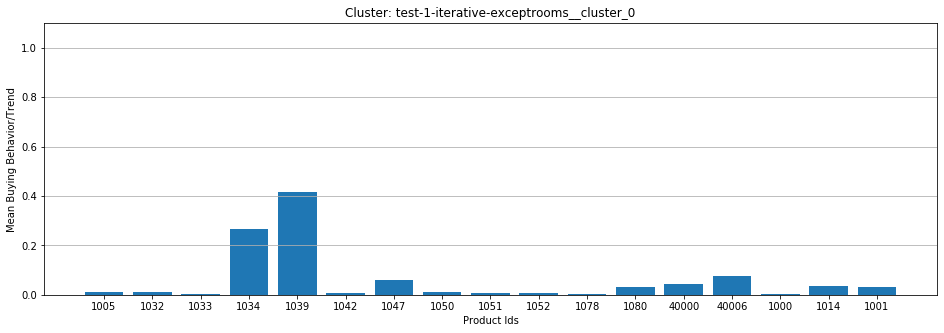

In [24]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[0][conquerDataColumns].values
plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)
plt.title('Cluster: test-1-iterative-exceptrooms__cluster_0')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:29:54,329 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:29:54,331 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


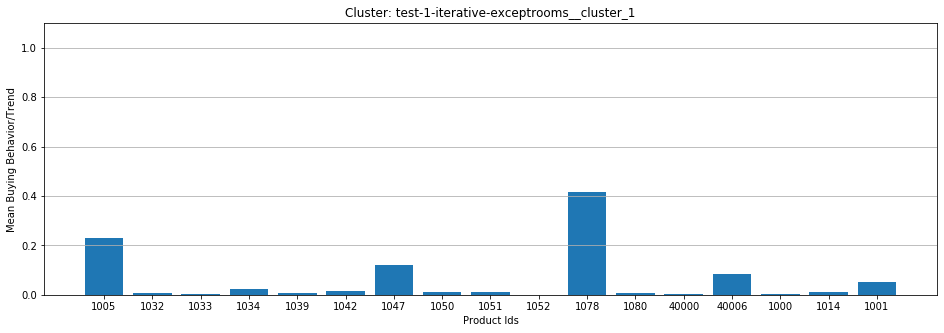

In [25]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[1][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_1')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:30:17,366 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:30:17,368 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


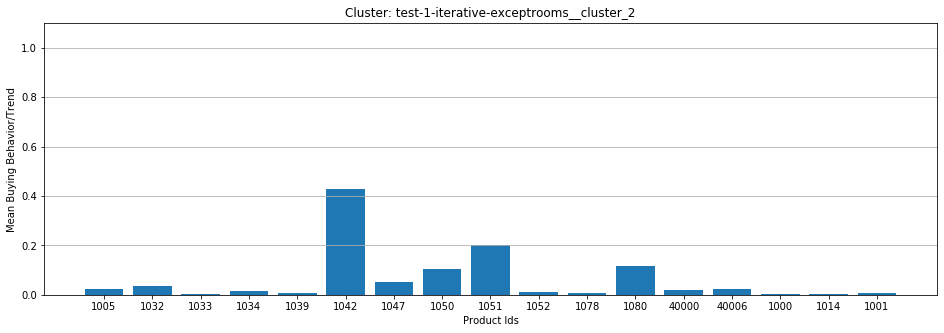

In [26]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[2][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_2')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:30:24,069 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:30:24,071 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


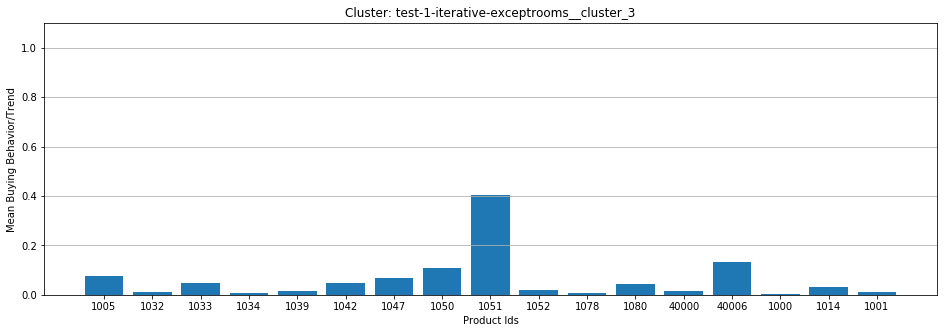

In [27]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[3][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_3')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:31:26,257 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:31:26,259 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


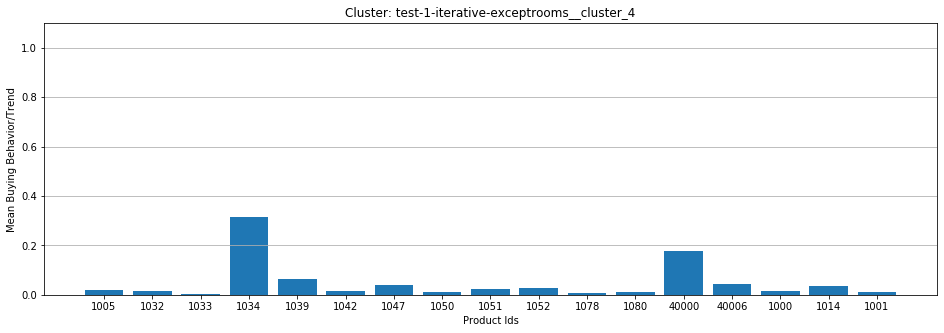

In [28]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[4][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_4')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:31:49,726 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:31:49,728 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


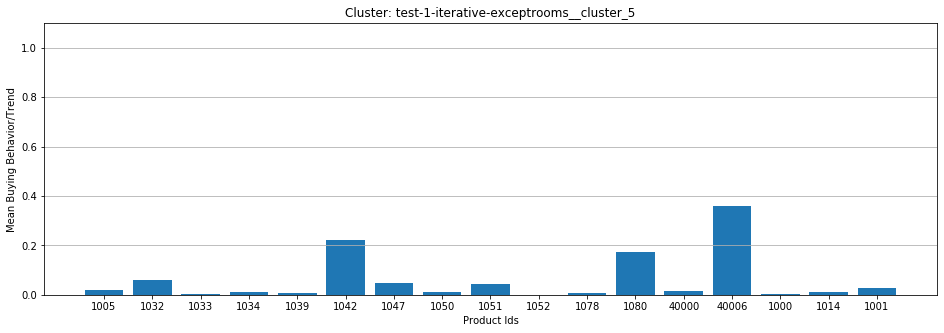

In [29]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[5][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_5')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:37:38,257 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:37:38,259 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


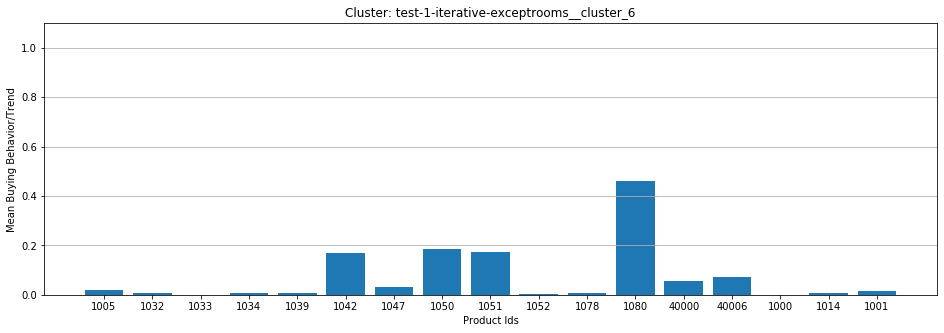

In [30]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[6][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_6')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:38:17,633 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:38:17,635 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


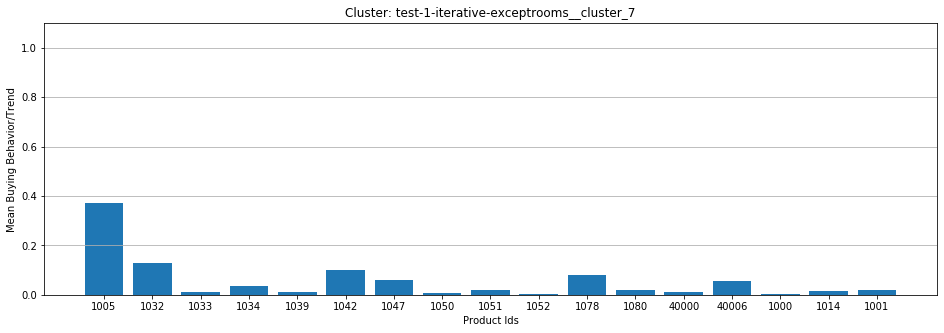

In [31]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[7][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_7')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:38:26,521 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:38:26,523 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


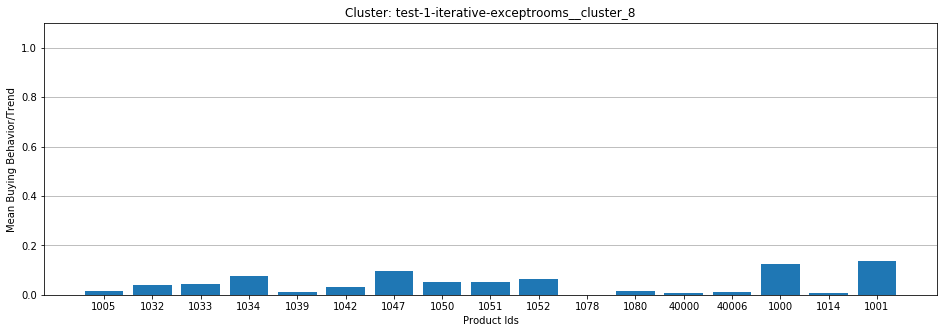

In [32]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[8][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_8')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:38:45,057 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:38:45,059 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


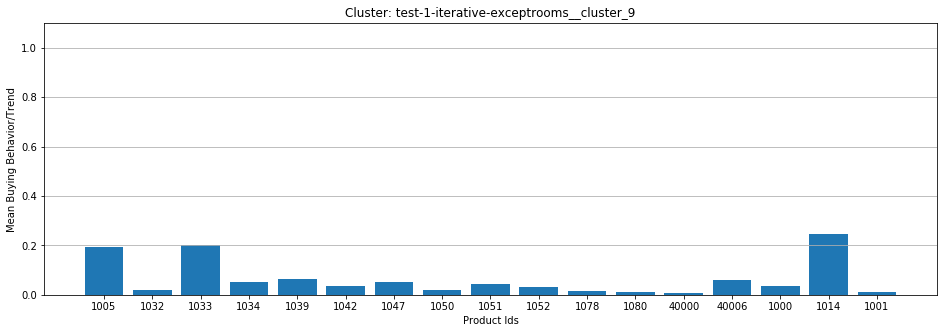

In [33]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[9][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_9')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')

2020-02-10 11:40:49,930 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-02-10 11:40:49,931 - 4706629056 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


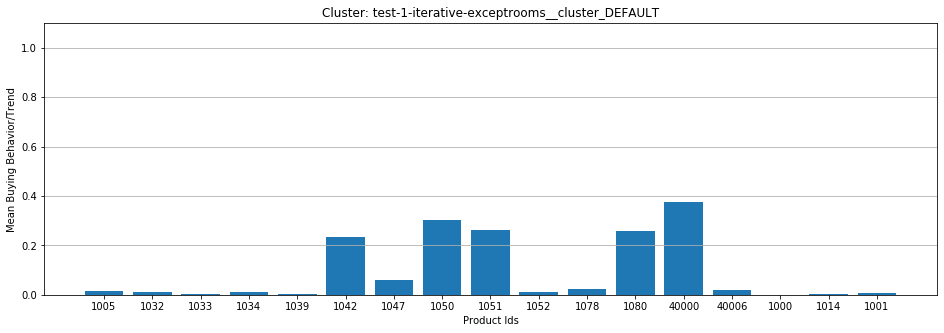

In [34]:
x= conquerDataColumns
y= dataForPred_buyTrendByCluster_Agg.loc[10][conquerDataColumns].values

plt.figure(figsize=(16,5))
plt.bar(x=x, height=y)
plt.ylim(0., 1.1)

plt.title('Cluster: test-1-iterative-exceptrooms__cluster_DEFAULT')
plt.xlabel('Product Ids')
plt.ylabel('Mean Buying Behavior/Trend')
plt.grid(axis='y')